# Pandas

In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame({'ProductName':['Bulb','Bulb','Fan','Fan'],
                  'Type':['A','B','A','A'],
                  'EC':[400.,300.,250.,300.]})

In [3]:
df

,ProductName,Type,EC
0,Bulb,A,400.0
1,Bulb,B,300.0
2,Fan,A,250.0
3,Fan,A,300.0


### Groupby column

$\;\;\;\;$ <code>df.groupby</code> Group DataFrame using a mapper or by a Series of columns. If not map this funtion will return object.

In [4]:
df.groupby(['ProductName'])

$\;\;\;\;$ Group and map a Series.

In [11]:
df.groupby(['ProductName']).mean(numeric_only=True)

,EC
ProductName,
Bulb,350.0
Fan,275.0


In [13]:
df.groupby([df.Type]).sum(numeric_only=True)

,EC
Type,
A,950.0
B,300.0


In [12]:
df.groupby([df.ProductName,df.Type]).sum(numeric_only=True)

EC
ProductName Type       
Bulb        A     400.0
            B     300.0
Fan         A     550.0

In [14]:
df

,ProductName,Type,EC
0,Bulb,A,400.0
1,Bulb,B,300.0
2,Fan,A,250.0
3,Fan,A,300.0


### Groupby Hieratchical Idexing

$\;\;\;\;\;$ We can be nested structure of indicies by Hieratchical Idexing.

In [2]:
A = [['Bulb','Bulb','Bulb','Fan','Fan','Fan'],
    ['A','B','C','A','B','C']]


# pd.MultiIndex : A multi-level, or hierarchical, index object for pandas objects.

#                                             level=0   level=1
indx = pd.MultiIndex.from_arrays(A,names=('ProductName','Type'))
df = pd.DataFrame({'EC': [20.,30,40,25,10,30]},index=indx)

In [3]:
df

EC
ProductName Type      
Bulb        A     20.0
            B     30.0
            C     40.0
Fan         A     25.0
            B     10.0
            C     30.0

In [4]:
df.groupby(level=0).sum()

,EC
ProductName,
Bulb,90.0
Fan,65.0


In [5]:
df.groupby(level=1).sum()

,EC
Type,
A,45.0
B,40.0
C,70.0


In [6]:
df.groupby(level="ProductName").sum()

,EC
ProductName,
Bulb,90.0
Fan,65.0


In [7]:
df.groupby(level="Type").sum()

,EC
Type,
A,45.0
B,40.0
C,70.0


### Rolling a data

$\;\;\;\;$ Provide rolling window calculations. This help in some situation that, For example
if we want to smooth out the data that possible the data contains a lot of noise. 
one way to handling the rolling window call help it this kind of stuff.

<div>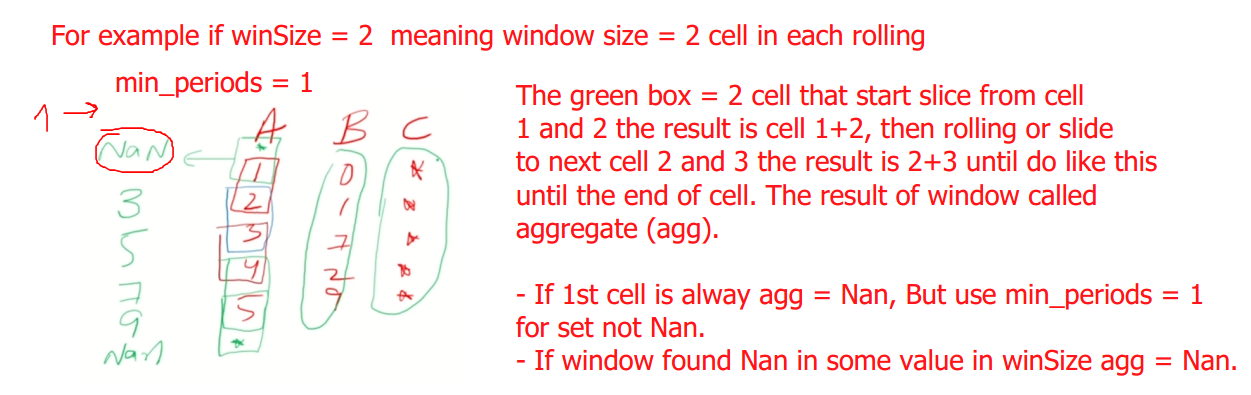</div>

In [9]:
import numpy as np

df = pd.DataFrame({'A':np.random.randint(0,10,5),
                  'B':np.random.randint(0,10,5),
                  'C':np.random.randint(0,10,5)})

In [10]:
df

,A,B,C
0,7,7,7
1,5,9,9
2,3,9,1
3,1,7,0
4,5,6,0


In [12]:
df.rolling(3).mean()

,A,B,C
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,5.0,8.333333,5.666667
3,3.0,8.333333,3.333333
4,3.0,7.333333,0.333333


In [13]:
df.rolling(3,min_periods=1).mean()

,A,B,C
0,7.0,7.000000,7.000000
1,6.0,8.000000,8.000000
2,5.0,8.333333,5.666667
3,3.0,8.333333,3.333333
4,3.0,7.333333,0.333333


$\;\;\;\;\;$ For example rolling in the real data set.

In [15]:
import seaborn as sns

In [16]:
iris = sns.load_dataset('iris')

In [17]:
type(iris)

pandas.core.frame.DataFrame

In [18]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [19]:
df = iris.drop(['species'],axis=1)

In [20]:
df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [21]:
df.rolling(3,min_periods=1,win_type='gaussian').sum(std=3)

,sepal_length,sepal_width,petal_length,petal_width
0,4.824393,3.310858,1.324343,0.189192
1,9.735201,6.337878,2.724343,0.389192
2,14.170403,9.337928,3.954091,0.578384
3,13.686615,8.970353,4.043282,0.578384
4,13.775807,9.532524,4.054091,0.578384
...,...,...,...,...
145,19.470453,9.164949,16.200150,6.851414
146,18.997473,8.486565,15.321766,6.462222
147,18.786665,8.175757,14.837978,5.967626
148,18.324493,8.581161,15.037978,5.973030


### Where

$\;\;\;\;$ Replace values where the condition is False.

In [22]:
df = pd.DataFrame(np.arange(10).reshape(5,2),columns=['A','B'])

In [23]:
df

,A,B
0,0,1
1,2,3
2,4,5
3,6,7
4,8,9


$\;\;\;\;$ We will see where will replace a condition that False.

In [24]:
df.where(df<5,-df)

,A,B
0,0,1
1,2,3
2,4,-5
3,-6,-7
4,-8,-9


In [26]:
df.where(((df<5) | (df%3==3)),-df)

,A,B
0,0,1
1,2,3
2,4,-5
3,-6,-7
4,-8,-9


In [27]:
idx = (df<5)|(df%3)

In [28]:
df.where(idx,-df)

,A,B
0,0,1
1,2,3
2,4,5
3,-6,7
4,8,-9


In [29]:
idx

,A,B
0,True,True
1,True,True
2,True,True
3,False,True
4,True,False


In [175]:
# We can do also this given result same as df.where()

df[~(df<5)] = -df

In [30]:
df

,A,B
0,0,1
1,2,3
2,4,5
3,6,7
4,8,9


### Clip a data

$\;\;\;\;$ Trim values at input threshold(s). For example, when we found the outliers in our data or we may have the data values that are not in a particular range and then want to clip those value.

In [36]:
df = pd.DataFrame(np.random.randint(0,50,(5,10)),
                 columns=list('ABCDEFGHIJ'))

In [37]:
df

,A,B,C,D,E,F,G,H,I,J
0,39,6,27,6,3,38,38,36,19,16
1,39,28,6,12,8,26,8,1,12,24
2,23,32,47,49,3,16,43,25,21,31
3,14,44,35,29,45,23,4,33,31,3
4,30,4,3,37,32,42,46,8,43,35


In [38]:
# If value < 10 will replace by 10
# If valuye >30 will replace by 30

df_clip = df.clip(10,30)

In [39]:
df_clip

,A,B,C,D,E,F,G,H,I,J
0,30,10,27,10,10,30,30,30,19,16
1,30,28,10,12,10,26,10,10,12,24
2,23,30,30,30,10,16,30,25,21,30
3,14,30,30,29,30,23,10,30,30,10
4,30,10,10,30,30,30,30,10,30,30


In [40]:
# We can do also this given result same as df.clip()

df[df<10] = 10
df[df>30] = 30

In [41]:
df

,A,B,C,D,E,F,G,H,I,J
0,30,10,27,10,10,30,30,30,19,16
1,30,28,10,12,10,26,10,10,12,24
2,23,30,30,30,10,16,30,25,21,30
3,14,30,30,29,30,23,10,30,30,10
4,30,10,10,30,30,30,30,10,30,30


### Merge a dataframe

In [42]:
df1 = pd.DataFrame({'E':['B','J','L','S'],
                   'G':['A','E','E','H']})
df2 = pd.DataFrame({'E':['L','B','J','S'],
                   'H':[2004,2008,2012,2018]})

In [43]:
print(df1);print(df2)

   E  G
0  B  A
1  J  E
2  L  E
3  S  H
   E     H
0  L  2004
1  B  2008
2  J  2012
3  S  2018


In [44]:
df1

,E,G
0,B,A
1,J,E
2,L,E
3,S,H


In [45]:
df2

,E,H
0,L,2004
1,B,2008
2,J,2012
3,S,2018


In [46]:
pd.merge(df1,df2)

,E,G,H
0,B,A,2008
1,J,E,2012
2,L,E,2004
3,S,H,2018


In [47]:
df3 = pd.merge(df1,df2)
df3

,E,G,H
0,B,A,2008
1,J,E,2012
2,L,E,2004
3,S,H,2018


In [48]:
df4 = pd.DataFrame({'G':['A','E','H'],
                   'S':['C','G','S']})
df4

,G,S
0,A,C
1,E,G
2,H,S


$\;\;\;\;$ We can joint base on specific column.

In [49]:
pd.merge(df3,df4,on='G')

,E,G,H,S
0,B,A,2008,C
1,J,E,2012,G
2,L,E,2004,G
3,S,H,2018,S


In [50]:
df5 = pd.DataFrame({'G':['A','A','E','E','H','H'],
                   'Sk':['M','S','C','L','S','O']})
df5

,G,Sk
0,A,M
1,A,S
2,E,C
3,E,L
4,H,S
5,H,O


In [51]:
df6 = pd.merge(df3,df4,on='G')

In [52]:
pd.merge(df6,df5,on='G')

,E,G,H,S,Sk
0,B,A,2008,C,M
1,B,A,2008,C,S
2,J,E,2012,G,C
3,J,E,2012,G,L
4,L,E,2004,G,C
5,L,E,2004,G,L
6,S,H,2018,S,S
7,S,H,2018,S,O


### Pivot Tables

$\;\;\;\;$ A pivot table is a table of statistics that summarizes the data of a more extensive table (such as from a database, spreadsheet, or business intelligence program). This summary might include sums, averages, or other statistics, which the pivot table groups together in a meaningful way. Pivot tables are a technique in data processing. They enable a person to arrange and rearrange (or "pivot") statistics in order to draw attention to useful information.

$\;\;\;\;$ A pivot table basically is can be though as a multi-dimensional variance that groupby aggregation.

In [2]:
from seaborn import load_dataset

In [3]:
T = load_dataset('titanic')

In [4]:
T.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
T.rename(columns={'sex':'gender'},inplace=True)

In [6]:
T.head()

,survived,pclass,gender,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
T.deck.isnull().sum()

688

In [8]:
T.drop(['deck'],axis=1,inplace=True)

In [9]:
T.head()

,survived,pclass,gender,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [10]:
T.groupby(['gender','class'])['survived'].mean()

gender  class 
female  First     0.968085
        Second    0.921053
        Third     0.500000
male    First     0.368852
        Second    0.157407
        Third     0.135447
Name: survived, dtype: float64

In [11]:
T.groupby(['gender','class'])['survived'].mean().unstack()

class,First,Second,Third
gender,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [12]:
# Column that need to agg in this example is 'survived' column

T.pivot_table('survived',index='gender',columns='class',aggfunc='mean')

class,First,Second,Third
gender,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


$\;\;\;\;$ The result of pivot tables will same as <code>df.groupby</code> if we given a same codition.

In [13]:
agePartitions = pd.cut(T['age'],[0,18,80])

In [14]:
agePartitions

0      (18.0, 80.0]
1      (18.0, 80.0]
2      (18.0, 80.0]
3      (18.0, 80.0]
4      (18.0, 80.0]
           ...     
886    (18.0, 80.0]
887    (18.0, 80.0]
888             NaN
889    (18.0, 80.0]
890    (18.0, 80.0]
Name: age, Length: 891, dtype: category
Categories (2, interval[int64, right]): [(0, 18] < (18, 80]]

In [15]:
T.pivot_table('survived',['gender', agePartitions],'class')

class               First    Second     Third
gender age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [16]:
farePartitions = pd.qcut(T['fare'],2)

In [17]:
T.pivot_table('survived',['gender',agePartitions],[farePartitions,'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
gender age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
gender age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

In [18]:
T.pivot_table(index='gender',columns='class',aggfunc={'survived':sum,'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
gender                                                        
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [19]:
T.head()

,survived,pclass,gender,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


### String method in Pandas

$\;\;\;\;$ It's quietly same as string method in Python.

In [20]:
T.gender = T.gender.str.upper()

In [21]:
T.head()

,survived,pclass,gender,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,MALE,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,FEMALE,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,FEMALE,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,FEMALE,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,MALE,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [22]:
T.gender.str.capitalize()

0        Male
1      Female
2      Female
3      Female
4        Male
        ...  
886      Male
887    Female
888    Female
889      Male
890      Male
Name: gender, Length: 891, dtype: object

In [23]:
T.embark_town.str.len()

0      11.0
1       9.0
2      11.0
3      11.0
4      11.0
       ... 
886    11.0
887    11.0
888    11.0
889     9.0
890    10.0
Name: embark_town, Length: 891, dtype: float64

In [25]:
# This way to cancatenate string column

T.gender.str.cat(T.embark_town.str)

C:\Users\Hp\AppData\Local\Temp\ipykernel_3896\444141512.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  T.gender.str.cat(T.embark_town.str)


0        MALESouthampton
1                    NaN
2      FEMALESouthampton
3      FEMALESouthampton
4        MALESouthampton
             ...        
886      MALESouthampton
887    FEMALESouthampton
888    FEMALESouthampton
889                  NaN
890                  NaN
Name: gender, Length: 891, dtype: object

In [26]:
T.embark_town.isnull().sum()

2

In [27]:
"abc,fgh,des".split(',')

['abc', 'fgh', 'des']

### Datetime in Pandas

In [28]:
from datetime import datetime

In [29]:
# This way can convert to datetime format

dates = pd.to_datetime([datetime(2016,7,3),'10th of July,2018',
                       '2017-Jul-19','10-09-2016','20160305'])

In [30]:
dates

DatetimeIndex(['2016-07-03', '2018-07-10', '2017-07-19', '2016-10-09',
               '2016-03-05'],
              dtype='datetime64[ns]', freq=None)

In [31]:
dates.to_period('D')

PeriodIndex(['2016-07-03', '2018-07-10', '2017-07-19', '2016-10-09',
             '2016-03-05'],
            dtype='period[D]')

In [32]:
# We can check different date how far from the subtracted.

dates-dates[0]

TimedeltaIndex(['0 days', '737 days', '381 days', '98 days', '-120 days'], dtype='timedelta64[ns]', freq=None)

### Ploting with Pandas

In [2]:
import numpy as np

df = pd.DataFrame({'A':np.random.normal(0,1,1000),
                  'B':np.random.normal(-2,2,1000),
                  'C':np.random.normal(5,4,1000)})

In [4]:
df.head()

,A,B,C
0,-1.062135,-0.216429,3.064073
1,-0.242150,-2.827159,7.047422
2,-1.516363,-0.299719,-0.170779
3,1.605915,-6.098050,-1.334761
4,0.600785,3.237634,9.281517


<Axes: >

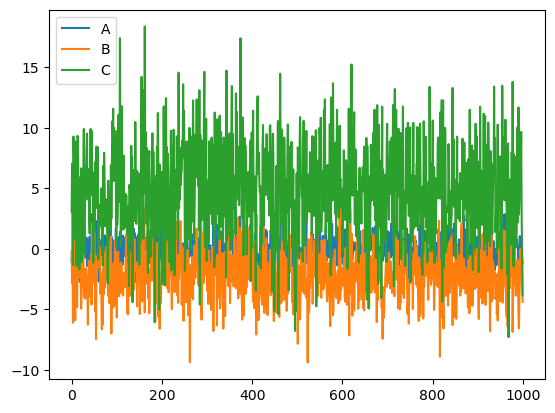

In [5]:
df.plot()

<Axes: ylabel='Frequency'>

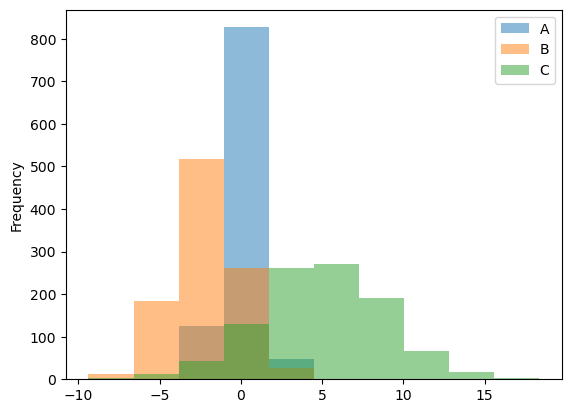

In [7]:
df.plot.hist(alpha=0.5)

<Axes: ylabel='Frequency'>

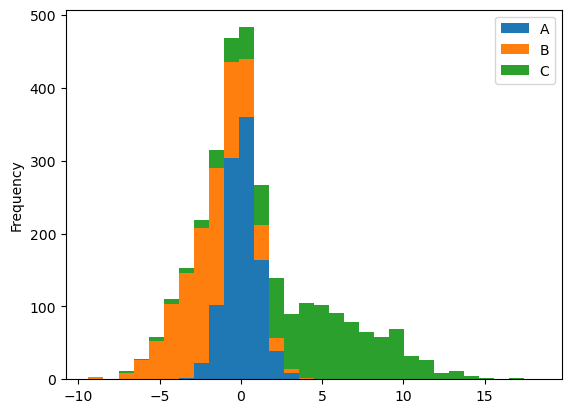

In [22]:
df.plot.hist(stacked=True, bins=30)

In [24]:
df2 = pd.DataFrame(np.random.randn(10,4),columns=list('abcd'))

<Axes: >

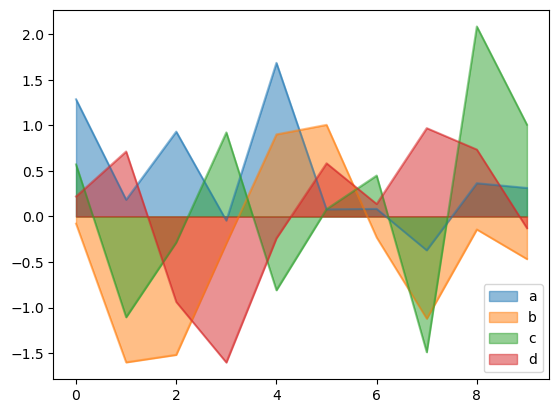

In [25]:
df2.plot.area(stacked=False)

In [29]:
df3 = pd.DataFrame(3*np.random.rand(4,2), index=list('abcd'), columns=list('xy'))

In [30]:
df3

,x,y
a,0.785996,2.495145
b,0.461048,1.378336
c,0.063249,0.031150
d,2.662082,0.693963


array([<Axes: ylabel='x'>, <Axes: ylabel='y'>], dtype=object)

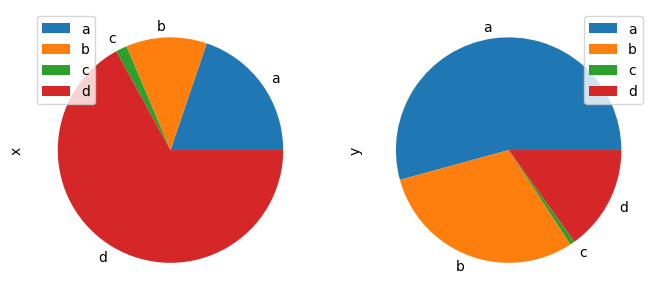

In [35]:
df3.plot.pie(subplots=True, figsize=(8,4))